In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [110]:
# Récupérer les données
from ucimlrepo import fetch_ucirepo
dataset = fetch_ucirepo(id=468)

In [111]:
import pandas as pd
# Extraction des features et de la cible
X = dataset.data.features
y = dataset.data.targets
# 1. Convertir en DataFrame si nécessaire
X = pd.DataFrame(X)
y = pd.Series(y.values.ravel()) 
# 🔹 1. Informations avant le prétraitement
print("\n🔹 Avant le prétraitement :")
print("Aperçu des données :")
print(X.head(), "\n")
print("Informations générales :")
print(X.info(), "\n")
print("Valeurs manquantes par colonne :")
print(X.isnull().sum(), "\n")
print("Statistiques descriptives :")
print(X.describe(), "\n")
# 2. Gestion des valeurs manquantes
X = X.dropna()  # Supprimer les valeurs manquantes




🔹 Avant le prétraitement :
Aperçu des données :
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1        

In [112]:

# 🔹 3. Encodage des variables catégoriques
categorical_features = X.select_dtypes(include=['object']).columns
for col in categorical_features:
    X[col] = LabelEncoder().fit_transform(X[col])

In [113]:
# 🔹 4. Normalisation des données numériques
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [114]:
# 5. Division en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [115]:
# 🔹 6. Informations après le prétraitement
print("\n🔹 Après le prétraitement :")
print(f"Taille du jeu d'entraînement : {X_train.shape}")
print(f"Taille du jeu de test : {X_test.shape}")
print("Distribution des classes dans y_train :")
print(pd.Series(y_train).value_counts(normalize=True), "\n")
print("Distribution des classes dans y_test :")
print(pd.Series(y_test).value_counts(normalize=True))


🔹 Après le prétraitement :
Taille du jeu d'entraînement : (9864, 17)
Taille du jeu de test : (2466, 17)
Distribution des classes dans y_train :
False    0.845296
True     0.154704
Name: proportion, dtype: float64 

Distribution des classes dans y_test :
False    0.845093
True     0.154907
Name: proportion, dtype: float64


In [116]:
# Affichage des dimensions finales
print(f"Taille du jeu d'entraînement : {X_train.shape}")
print(f"Taille du jeu de test : {X_test.shape}")


Taille du jeu d'entraînement : (9864, 17)
Taille du jeu de test : (2466, 17)


In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [118]:
# 🔹 Récupérer les données
from ucimlrepo import fetch_ucirepo
dataset = fetch_ucirepo(id=468)

# Extraction des features et de la cible
X = dataset.data.features
y = dataset.data.targets

# Convertir en DataFrame si nécessaire
X = pd.DataFrame(X)
y = pd.Series(y.values.ravel())  # Correction pour s'assurer que y est 1D



In [119]:
# 🔹 Gestion des valeurs manquantes
X = X.dropna()

# 🔹 Encodage des variables catégoriques
categorical_features = X.select_dtypes(include=['object']).columns
for col in categorical_features:
    X[col] = LabelEncoder().fit_transform(X[col])


In [120]:
# 🔹 Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [121]:
# 🔹 Division en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [122]:
# 🔹 Définition du modèle KNN
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)



Résultats pour KNN :
Accuracy: 0.8682076236820763
CrossVal Mean: 0.8770275750202758
CrossVal Std: 0.0029626194639502446
Precision (Classe 1): nan
Recall (Classe 1): nan
F1-score (Classe 1): nan


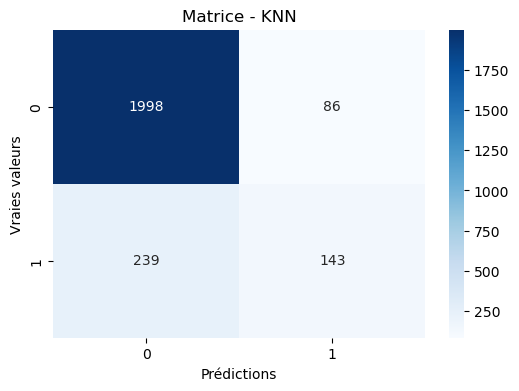

In [123]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*Could not find the number of physical cores.*")

# Entraînement et évaluation du modèle KNN
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

# Validation croisée avec n_jobs=None pour éviter l'erreur de détection des cœurs
cv_scores_knn = cross_val_score(model_knn, X_train, y_train, cv=3, scoring='accuracy', n_jobs=None)

# Évaluation du modèle
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

# Récupération des métriques
precision_class_1_knn = report_knn.get('1', {}).get('precision', np.nan)
recall_class_1_knn = report_knn.get('1', {}).get('recall', np.nan)
f1_score_class_1_knn = report_knn.get('1', {}).get('f1-score', np.nan)

# Affichage des résultats pour KNN
print(f"Résultats pour KNN :")
print(f"Accuracy: {accuracy_knn}")
print(f"CrossVal Mean: {np.mean(cv_scores_knn)}")
print(f"CrossVal Std: {np.std(cv_scores_knn)}")
print(f"Precision (Classe 1): {precision_class_1_knn}")
print(f"Recall (Classe 1): {recall_class_1_knn}")
print(f"F1-score (Classe 1): {f1_score_class_1_knn}")

# Affichage de la matrice de confusion pour KNN
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice - KNN")
plt.show()


    


In [124]:
# 🔹 Définition du modèle Régression Logistique
from sklearn.linear_model import LogisticRegression

model_log_reg = LogisticRegression(max_iter=1000)


Résultats pour Régression Logistique :
Accuracy: 0.8832116788321168
CrossVal Mean: 0.8849351175993512
CrossVal Std: 0.004022066996122765
Precision (Classe 1): nan
Recall (Classe 1): nan
F1-score (Classe 1): nan


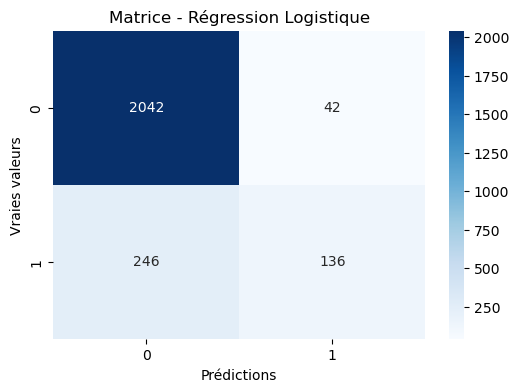

In [125]:
# 🔹 Entraînement et évaluation du modèle Régression Logistique
model_log_reg.fit(X_train, y_train)
y_pred_log_reg = model_log_reg.predict(X_test)

# Validation croisée
cv_scores_log_reg = cross_val_score(model_log_reg, X_train, y_train, cv=3, scoring='accuracy')

# Évaluation du modèle
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg, output_dict=True)

# Récupération des métriques
precision_class_1_log_reg = report_log_reg.get('1', {}).get('precision', np.nan)
recall_class_1_log_reg = report_log_reg.get('1', {}).get('recall', np.nan)
f1_score_class_1_log_reg = report_log_reg.get('1', {}).get('f1-score', np.nan)

# Affichage des résultats pour Régression Logistique
print(f"Résultats pour Régression Logistique :\nAccuracy: {accuracy_log_reg}\nCrossVal Mean: {np.mean(cv_scores_log_reg)}\nCrossVal Std: {np.std(cv_scores_log_reg)}")
print(f"Precision (Classe 1): {precision_class_1_log_reg}")
print(f"Recall (Classe 1): {recall_class_1_log_reg}")
print(f"F1-score (Classe 1): {f1_score_class_1_log_reg}")

# Affichage de la matrice de confusion pour Régression Logistique
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice - Régression Logistique")
plt.show()


In [126]:
# 🔹 Définition du modèle SVM
from sklearn.svm import SVC

model_svm = SVC(kernel='linear')


Résultats pour SVM :
Accuracy: 0.8799675587996756
CrossVal Mean: 0.8880778588807786
CrossVal Std: 0.002580681683162592
Precision (Classe 1): nan
Recall (Classe 1): nan
F1-score (Classe 1): nan


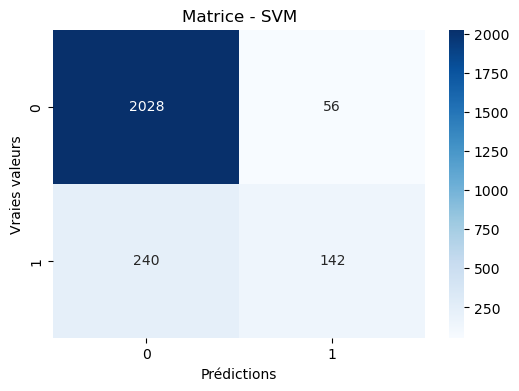

In [127]:
# 🔹 Entraînement et évaluation du modèle SVM
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

# Validation croisée
cv_scores_svm = cross_val_score(model_svm, X_train, y_train, cv=3, scoring='accuracy')

# Évaluation du modèle
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm, output_dict=True)

# Récupération des métriques
precision_class_1_svm = report_svm.get('1', {}).get('precision', np.nan)
recall_class_1_svm = report_svm.get('1', {}).get('recall', np.nan)
f1_score_class_1_svm = report_svm.get('1', {}).get('f1-score', np.nan)

# Affichage des résultats pour SVM
print(f"Résultats pour SVM :\nAccuracy: {accuracy_svm}\nCrossVal Mean: {np.mean(cv_scores_svm)}\nCrossVal Std: {np.std(cv_scores_svm)}")
print(f"Precision (Classe 1): {precision_class_1_svm}")
print(f"Recall (Classe 1): {recall_class_1_svm}")
print(f"F1-score (Classe 1): {f1_score_class_1_svm}")

# Affichage de la matrice de confusion pour SVM
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice - SVM")
plt.show()


In [128]:
# 🔹 Définition du modèle Arbre de Décision
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=5, random_state=42)


Résultats pour Arbre de Décision :
Accuracy: 0.8998377939983779
CrossVal Mean: 0.8975060827250608
CrossVal Std: 0.005624465331176053
Precision (Classe 1): nan
Recall (Classe 1): nan
F1-score (Classe 1): nan


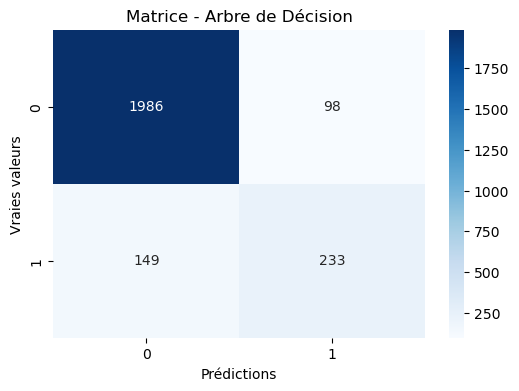

In [129]:
# 🔹 Entraînement et évaluation du modèle Arbre de Décision
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

# Validation croisée
cv_scores_dt = cross_val_score(model_dt, X_train, y_train, cv=3, scoring='accuracy')

# Évaluation du modèle
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)

# Récupération des métriques
precision_class_1_dt = report_dt.get('1', {}).get('precision', np.nan)
recall_class_1_dt = report_dt.get('1', {}).get('recall', np.nan)
f1_score_class_1_dt = report_dt.get('1', {}).get('f1-score', np.nan)

# Affichage des résultats pour Arbre de Décision
print(f"Résultats pour Arbre de Décision :\nAccuracy: {accuracy_dt}\nCrossVal Mean: {np.mean(cv_scores_dt)}\nCrossVal Std: {np.std(cv_scores_dt)}")
print(f"Precision (Classe 1): {precision_class_1_dt}")
print(f"Recall (Classe 1): {recall_class_1_dt}")
print(f"F1-score (Classe 1): {f1_score_class_1_dt}")

# Affichage de la matrice de confusion pour Arbre de Décision
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice - Arbre de Décision")
plt.show()


In [130]:
# 🔹 Définition et entraînement du modèle Réseau de Neurones (MLPClassifier)
model_nn = MLPClassifier(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', 
                         max_iter=2000, learning_rate_init=0.001, warm_start=True)
model_nn.fit(X_train, y_train)
y_pred_nn = model_nn.predict(X_test)

# Validation croisée
cv_scores_nn = cross_val_score(model_nn, X_train, y_train, cv=3, scoring='accuracy')



Résultats pour le Réseau de Neurones :
Accuracy: 0.8860502838605029
CrossVal Mean: 0.8894971613949716
CrossVal Std: 0.0013676741244152656
Precision (Classe 1): nan
Recall (Classe 1): nan
F1-score (Classe 1): nan


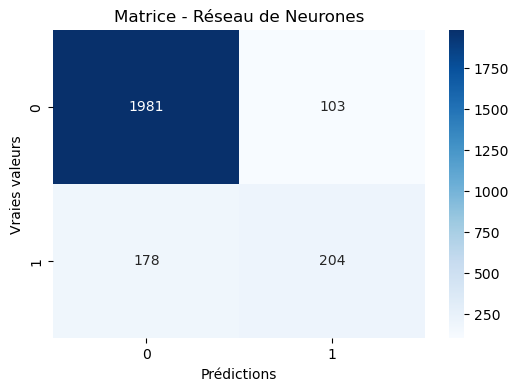

In [131]:
# Évaluation du modèle
accuracy_nn = accuracy_score(y_test, y_pred_nn)
report_nn = classification_report(y_test, y_pred_nn, output_dict=True)

# Récupération des métriques
precision_class_1_nn = report_nn.get('1', {}).get('precision', np.nan)
recall_class_1_nn = report_nn.get('1', {}).get('recall', np.nan)
f1_score_class_1_nn = report_nn.get('1', {}).get('f1-score', np.nan)

# Affichage des résultats pour le Réseau de Neurones
print(f"Résultats pour le Réseau de Neurones :")
print(f"Accuracy: {accuracy_nn}")
print(f"CrossVal Mean: {np.mean(cv_scores_nn)}")
print(f"CrossVal Std: {np.std(cv_scores_nn)}")
print(f"Precision (Classe 1): {precision_class_1_nn}")
print(f"Recall (Classe 1): {recall_class_1_nn}")
print(f"F1-score (Classe 1): {f1_score_class_1_nn}")

# Affichage de la matrice de confusion pour le Réseau de Neurones
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice - Réseau de Neurones")
plt.show()


In [132]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# 🔹 1. KNN - Recherche des meilleurs hyperparamètres
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Nombre de voisins à tester
    'weights': ['uniform', 'distance'],  # Poids des voisins
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Types de métriques à tester
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print("Meilleurs paramètres pour KNN :")
print(grid_search_knn.best_params_)
print(f"Meilleur score (accuracy) pour KNN : {grid_search_knn.best_score_}")


Meilleurs paramètres pour KNN :
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Meilleur score (accuracy) pour KNN : 0.8815901074238528


In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 🔹 2. Régression Logistique - Recherche des meilleurs hyperparamètres
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],  # Regularisation
    'solver': ['lbfgs', 'liblinear'],  # Solvers à tester
    'max_iter': [100, 200, 500]  # Nombre d'itérations
}

grid_search_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

print("\nMeilleurs paramètres pour Régression Logistique :")
print(grid_search_lr.best_params_)
print(f"Meilleur score (accuracy) pour Régression Logistique : {grid_search_lr.best_score_}")



Meilleurs paramètres pour Régression Logistique :
{'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}
Meilleur score (accuracy) pour Régression Logistique : 0.8849351175993512


In [134]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# 🔹 3. SVM - Recherche des meilleurs hyperparamètres
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularisation
    'kernel': ['linear', 'rbf'],  # Types de noyau à tester
    'gamma': ['scale', 'auto']  # Paramètre gamma pour le noyau 'rbf'
}

grid_search_svm = GridSearchCV(SVC(), param_grid_svm, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

print("\nMeilleurs paramètres pour SVM :")
print(grid_search_svm.best_params_)
print(f"Meilleur score (accuracy) pour SVM : {grid_search_svm.best_score_}")



Meilleurs paramètres pour SVM :
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Meilleur score (accuracy) pour SVM : 0.8920316301703163


In [135]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 🔹 4. Arbre de Décision - Recherche des meilleurs hyperparamètres
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],  # Profondeur maximale de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons pour diviser un noeud
    'min_samples_leaf': [1, 2, 4]  # Nombre minimum d'échantillons pour qu'un noeud soit une feuille
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

print("\nMeilleurs paramètres pour Arbre de Décision :")
print(grid_search_dt.best_params_)
print(f"Meilleur score (accuracy) pour Arbre de Décision : {grid_search_dt.best_score_}")



Meilleurs paramètres pour Arbre de Décision :
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Meilleur score (accuracy) pour Arbre de Décision : 0.8975060827250608


In [136]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV






In [137]:
param_grid_nn = {
    'hidden_layer_sizes': [(16,)],  # Seulement 1 couche avec 16 neurones
    'activation': ['relu'],  
    'solver': ['adam'],  
    'alpha': [0.0001],  # Une seule valeur pour éviter les tests inutiles
    'max_iter': [100]  # Réduction du nombre d'itérations
}


In [138]:
# Réduction de la taille des données pour accélérer l'entraînement
X_train_subset = X_train[:1000]  # Utilisation d'un sous-ensemble (peut être ajusté)
y_train_subset = y_train[:1000]


In [139]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

# 🔹 Standardisation des données
scaler = StandardScaler()
X_train_subset_scaled = scaler.fit_transform(X_train[:500])  # Normalisation
y_train_subset = y_train[:500]

# 🔹 Hyperparamètres améliorés
param_grid_nn = {
    'hidden_layer_sizes': [(16,), (32,)],  
    'activation': ['relu'],  
    'solver': ['adam', 'lbfgs'],  # Ajout de lbfgs pour voir s'il converge mieux
    'alpha': [1e-5, 1e-6],  # Réduction pour éviter une régularisation trop forte
    'max_iter': [2000],  # Augmentation pour permettre plus d'itérations
    'tol': [1e-5]  # Réduction du critère d'arrêt prématuré
}

# 🔹 Utilisation de RandomizedSearchCV
random_search_nn = RandomizedSearchCV(
    MLPClassifier(warm_start=True),  # Permet de continuer l'entraînement si besoin
    param_distributions=param_grid_nn,
    n_iter=5,  # Augmenté pour tester plus de combinaisons
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# 🔹 Entraînement avec données normalisées
random_search_nn.fit(X_train_subset_scaled, y_train_subset)

# 🔹 Affichage des meilleurs résultats
print("\nMeilleurs paramètres pour Réseau de Neurones :")
print(random_search_nn.best_params_)
print(f"Meilleur score (accuracy) pour Réseau de Neurones : {random_search_nn.best_score_}")




Fitting 3 folds for each of 5 candidates, totalling 15 fits

Meilleurs paramètres pour Réseau de Neurones :
{'tol': 1e-05, 'solver': 'adam', 'max_iter': 2000, 'hidden_layer_sizes': (32,), 'alpha': 1e-05, 'activation': 'relu'}
Meilleur score (accuracy) pour Réseau de Neurones : 0.9000192386311715


In [140]:
# Affichage des résultats
print("\nMeilleurs paramètres pour Réseau de Neurones :")
print(random_search_nn.best_params_)
print(f"Meilleur score (accuracy) pour Réseau de Neurones : {random_search_nn.best_score_}")



Meilleurs paramètres pour Réseau de Neurones :
{'tol': 1e-05, 'solver': 'adam', 'max_iter': 2000, 'hidden_layer_sizes': (32,), 'alpha': 1e-05, 'activation': 'relu'}
Meilleur score (accuracy) pour Réseau de Neurones : 0.9000192386311715


In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Liste des modèles et de leurs prédictions
models = [grid_search_knn, grid_search_lr, grid_search_svm, grid_search_dt, random_search_nn]
model_names = ['KNN', 'Régression Logistique', 'SVM', 'Arbre de Décision', 'Réseau de Neurones']

In [144]:
# Initialisation des listes pour stocker les scores
accuracy_train = []
accuracy_test = []
precision_train = []
precision_test = []
recall_train = []
recall_test = []
f1_train = []
f1_test = []
train_errors = []
test_errors = []

# Calcul des scores et des erreurs
for model, name in zip(models, model_names):
    # Prédictions sur l'entraînement et sur le test
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

In [145]:
    # Calcul des scores
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    accuracy_test.append(accuracy_score(y_test, y_pred_test))
    
    precision_train.append(precision_score(y_train, y_pred_train, average='binary', pos_label=1))
    precision_test.append(precision_score(y_test, y_pred_test, average='binary', pos_label=1))
    
    recall_train.append(recall_score(y_train, y_pred_train, average='binary', pos_label=1))
    recall_test.append(recall_score(y_test, y_pred_test, average='binary', pos_label=1))
    
    f1_train.append(f1_score(y_train, y_pred_train, average='binary', pos_label=1))
    f1_test.append(f1_score(y_test, y_pred_test, average='binary', pos_label=1))


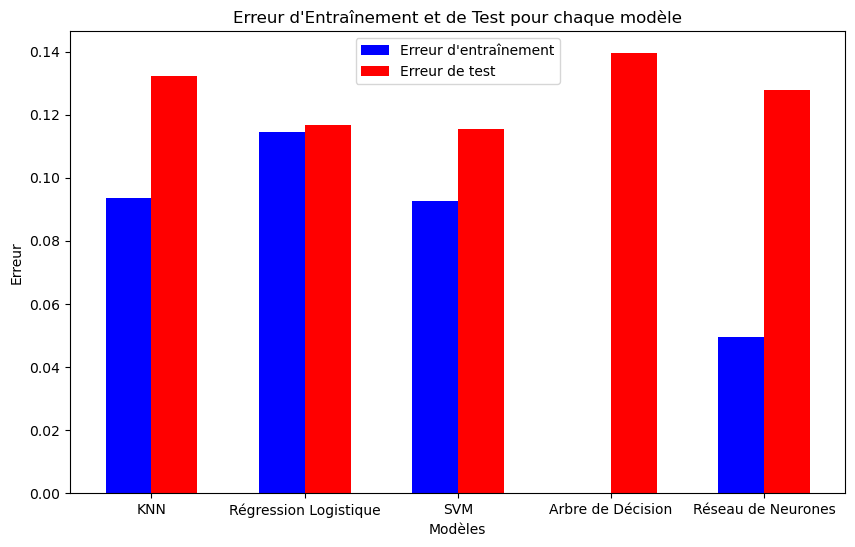

In [148]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Standardisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Définition des modèles avec correction
model_knn = KNeighborsClassifier(n_neighbors=5)
model_lr = LogisticRegression()
model_svm = SVC()
model_tree = DecisionTreeClassifier()
model_nn = MLPClassifier(hidden_layer_sizes=(32, 32), max_iter=1000, solver='adam', alpha=1e-5)  # Augmentation de max_iter

# 🔹 Initialisation des listes d'erreurs
train_errors = []
test_errors = []
models_names = ['KNN', 'Régression Logistique', 'SVM', 'Arbre de Décision', 'Réseau de Neurones']
models = [model_knn, model_lr, model_svm, model_tree, model_nn]

# 🔹 Boucle sur chaque modèle pour ajuster et calculer les erreurs
for model in models:
    # Entraînement du modèle
    model.fit(X_train_scaled, y_train)  # Utilisation des données standardisées
    
    # Prédictions
    y_pred_train = model.predict(X_train_scaled).astype(float)
    y_pred_test = model.predict(X_test_scaled).astype(float)
    
    # Conversion des vraies valeurs en float pour éviter l'erreur TypeError
    y_train_float = y_train.astype(float)
    y_test_float = y_test.astype(float)

    # Calcul des erreurs (MAE : Erreur Moyenne Absolue)
    train_errors.append(mean_absolute_error(y_train_float, y_pred_train))  
    test_errors.append(mean_absolute_error(y_test_float, y_pred_test))      

# 📊 Affichage des erreurs d'entraînement et de test
plt.figure(figsize=(10, 6))
bar_width = 0.3
index = np.arange(len(models))

plt.bar(index, train_errors, bar_width, label="Erreur d'entraînement", color='blue')
plt.bar(index + bar_width, test_errors, bar_width, label="Erreur de test", color='red')

# 📌 Paramètres du graphique
plt.xlabel('Modèles')
plt.ylabel('Erreur')
plt.title("Erreur d'Entraînement et de Test pour chaque modèle")
plt.xticks(index + bar_width / 2, models_names)
plt.legend()
plt.show()




In [149]:
import pandas as pd

# Trouver la longueur maximale parmi toutes les listes
max_length = max(len(lst) for lst in [
    model_names, accuracy_train, accuracy_test,
    precision_train, precision_test,
    recall_train, recall_test,
    f1_train, f1_test, train_errors, test_errors
])

# Fonction pour ajuster la taille des listes en les complétant avec None
def pad_list(lst, length):
    return lst + [None] * (length - len(lst))

# Ajuster toutes les listes à la même longueur
model_names = pad_list(model_names, max_length)
accuracy_train = pad_list(accuracy_train, max_length)
accuracy_test = pad_list(accuracy_test, max_length)
precision_train = pad_list(precision_train, max_length)
precision_test = pad_list(precision_test, max_length)
recall_train = pad_list(recall_train, max_length)
recall_test = pad_list(recall_test, max_length)
f1_train = pad_list(f1_train, max_length)
f1_test = pad_list(f1_test, max_length)
train_errors = pad_list(train_errors, max_length)
test_errors = pad_list(test_errors, max_length)

# Création du DataFrame après ajustement
results_df = pd.DataFrame({
    'Modèle': model_names,
    'Accuracy Train': accuracy_train,
    'Accuracy Test': accuracy_test,
    'Précision Train': precision_train,
    'Précision Test': precision_test,
    'Rappel Train': recall_train,
    'Rappel Test': recall_test,
    'F1-score Train': f1_train,
    'F1-score Test': f1_test,
    'Erreur Train': train_errors,
    'Erreur Test': test_errors
})

# Affichage des résultats triés par "Accuracy Test"
print(results_df.sort_values(by="Accuracy Test", ascending=False))


                  Modèle  Accuracy Train  Accuracy Test  Précision Train  \
0                    KNN        0.876419       0.866586         0.650934   
1  Régression Logistique             NaN            NaN              NaN   
2                    SVM             NaN            NaN              NaN   
3      Arbre de Décision             NaN            NaN              NaN   
4     Réseau de Neurones             NaN            NaN              NaN   

   Précision Test  Rappel Train  Rappel Test  F1-score Train  F1-score Test  \
0        0.612766      0.433814     0.376963        0.520645       0.466775   
1             NaN           NaN          NaN             NaN            NaN   
2             NaN           NaN          NaN             NaN            NaN   
3             NaN           NaN          NaN             NaN            NaN   
4             NaN           NaN          NaN             NaN            NaN   

   Erreur Train  Erreur Test  
0      0.093471     0.132198  
1     

<BarContainer object of 5 artists>

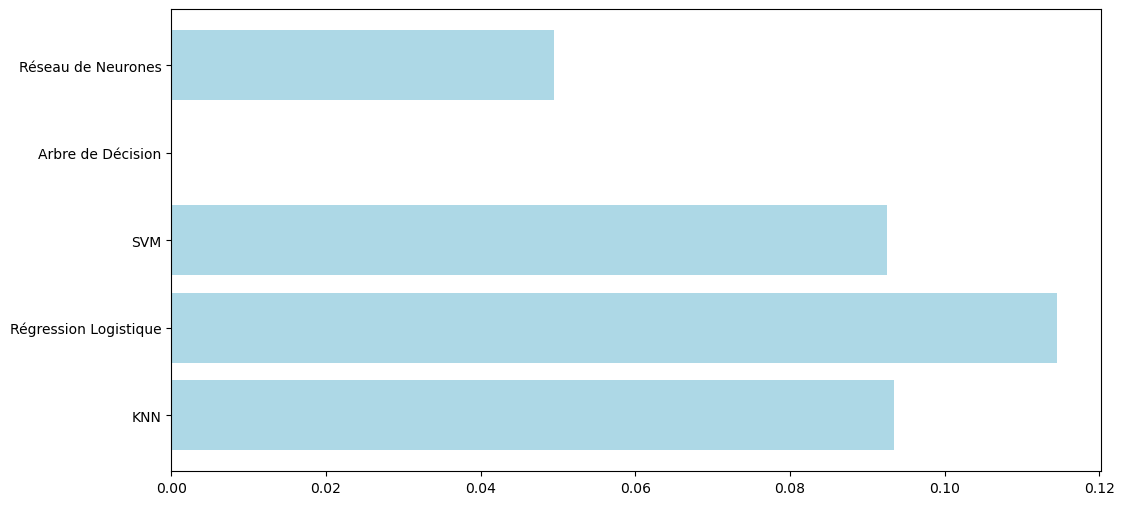

In [150]:
import matplotlib.pyplot as plt
import numpy as np

# Visualisation des erreurs d'entraînement et de test pour chaque modèle
plt.figure(figsize=(12, 6))

# Affichage de l'erreur d'entraînement
plt.barh(model_names, train_errors, color='lightblue', label='Erreur d\'Entraînement')

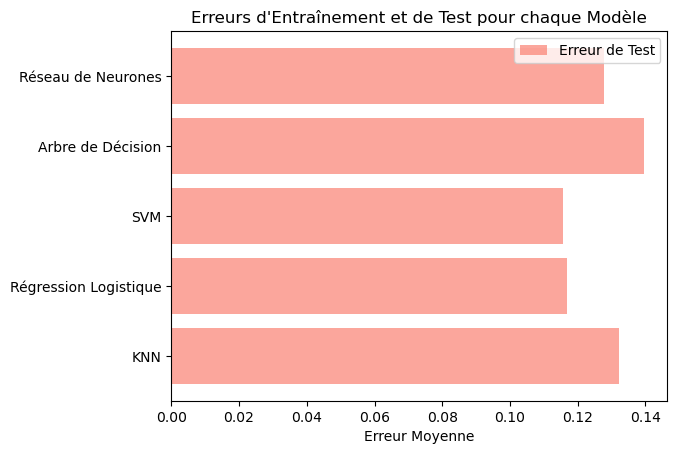

In [151]:
# Affichage de l'erreur de test (généralisation)
plt.barh(model_names, test_errors, color='salmon', alpha=0.7, label='Erreur de Test')

plt.xlabel("Erreur Moyenne")
plt.title("Erreurs  de Test pour chaque Modèle")
plt.legend()
plt.show()


In [152]:
# Calcul de l'écart entre l'erreur d'entraînement et d_test pour chaque modèle
error_gap = np.array(train_errors) - np.array(test_errors)

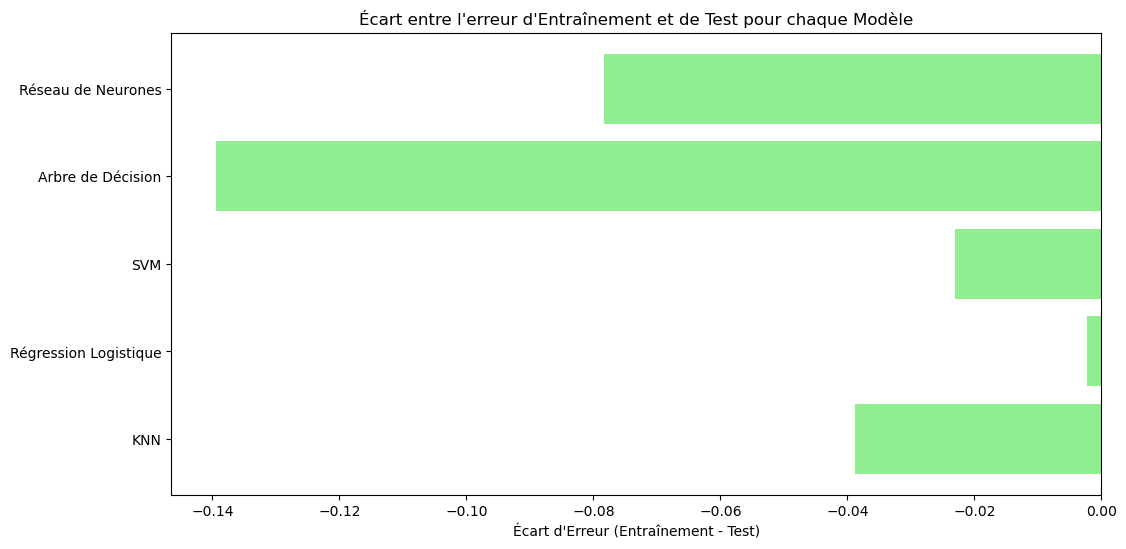

In [153]:
# Visualisation de l'écart
plt.figure(figsize=(12, 6))
plt.barh(model_names, error_gap, color='lightgreen')

plt.xlabel("Écart d'Erreur (Entraînement - Test)")
plt.title("Écart entre l'erreur d'Entraînement et de Test pour chaque Modèle")
plt.show()


In [154]:
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.metrics import accuracy_score

# Définition des modèles avec régularisation
ridge_log_reg = LogisticRegression(penalty='l2', solver='liblinear')  # Ridge (L2)
lasso_log_reg = LogisticRegression(penalty='l1', solver='liblinear')  # Lasso (L1)
log_reg = LogisticRegression(penalty='none', solver='liblinear')  # Logistic Regression sans régularisation

In [155]:
from sklearn.linear_model import LogisticRegression

# Correction de l'initialisation du modèle
log_reg = LogisticRegression(penalty=None)  # Utiliser None au lieu de 'none'

# Entraînement des modèles
ridge_log_reg.fit(X_train, y_train)
lasso_log_reg.fit(X_train, y_train)
log_reg.fit(X_train, y_train)  # Cela ne devrait plus générer d'erreur


LogisticRegression(penalty=None)

In [156]:
# Prédictions sur l'ensemble de test
y_pred_ridge = ridge_log_reg.predict(X_test)
y_pred_lasso = lasso_log_reg.predict(X_test)
y_pred = log_reg.predict(X_test)

In [157]:
# Calcul des scores (accuracy)
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
accuracy_log_reg = accuracy_score(y_test, y_pred)

# Affichage des résultats
print(f"Accuracy - Ridge Regularization: {accuracy_ridge}")
print(f"Accuracy - Lasso Regularization: {accuracy_lasso}")
print(f"Accuracy - Logistic Regression (no regularization): {accuracy_log_reg}")

Accuracy - Ridge Regularization: 0.883617193836172
Accuracy - Lasso Regularization: 0.883617193836172
Accuracy - Logistic Regression (no regularization): 0.8832116788321168


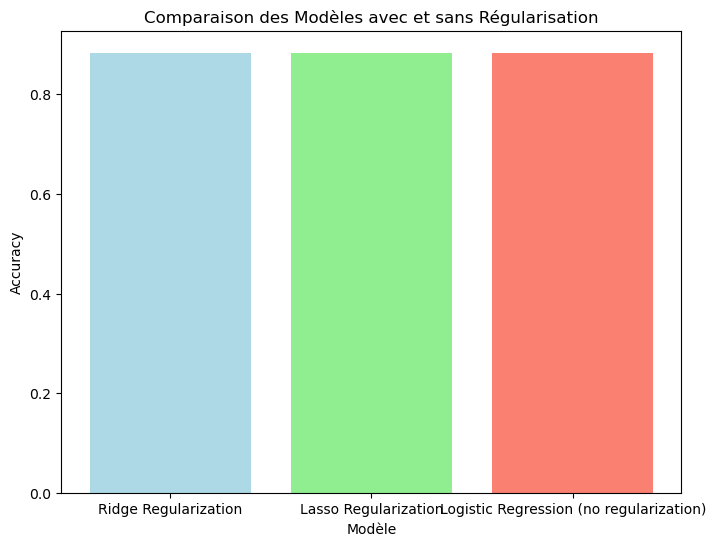

In [158]:
import matplotlib.pyplot as plt

# Visualisation des résultats (Accuracy)
labels = ['Ridge Regularization', 'Lasso Regularization', 'Logistic Regression (no regularization)']
accuracies = [accuracy_ridge, accuracy_lasso, accuracy_log_reg]

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['lightblue', 'lightgreen', 'salmon'])
plt.xlabel("Modèle")
plt.ylabel("Accuracy")
plt.title("Comparaison des Modèles avec et sans Régularisation")
plt.show()


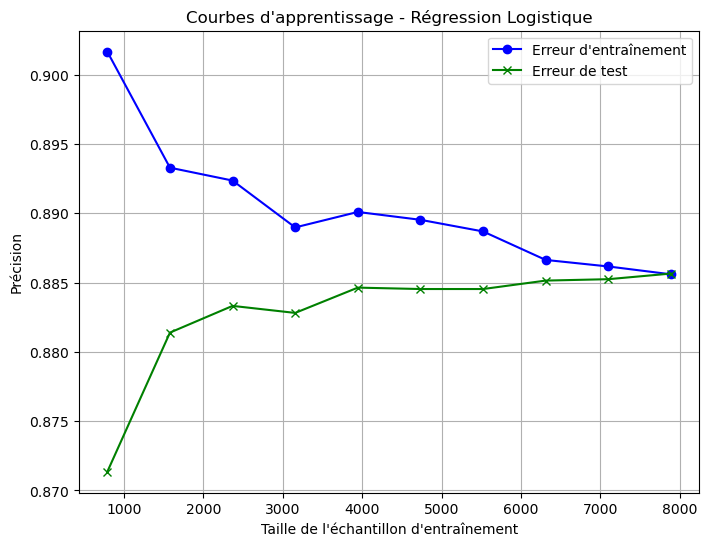

In [159]:
# Pour les modèles utilisant la validation croisée
# Prendre en compte les erreurs d'entrainement et de test pour chaque modèle

# Exemple pour un modèle (par exemple, Régression Logistique)
from sklearn.model_selection import learning_curve

# Fonction pour afficher les courbes d'apprentissage
def plot_learning_curve(model, X_train, y_train, title="Courbes d'apprentissage"):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label="Erreur d'entraînement", color='blue', linestyle='-', marker='o')
    plt.plot(train_sizes, test_mean, label="Erreur de test", color='green', linestyle='-', marker='x')
    plt.title(title)
    plt.xlabel("Taille de l'échantillon d'entraînement")
    plt.ylabel("Précision")
    plt.legend()
    plt.grid(True)
    plt.show()

# Appliquer la fonction à un modèle, par exemple la régression logistique
model_lr = LogisticRegression(max_iter=1000)
plot_learning_curve(model_lr, X_train, y_train, "Courbes d'apprentissage - Régression Logistique")


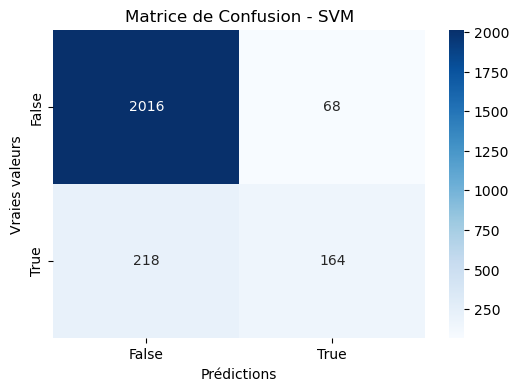

In [160]:
# Fonction pour afficher la matrice de confusion
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
    plt.xlabel("Prédictions")
    plt.ylabel("Vraies valeurs")
    plt.title(f"Matrice de Confusion - {model_name}")
    plt.show()

# Appliquer à chaque modèle, par exemple, pour le modèle SVM
plot_confusion_matrix(model_svm, X_test, y_test, "SVM")


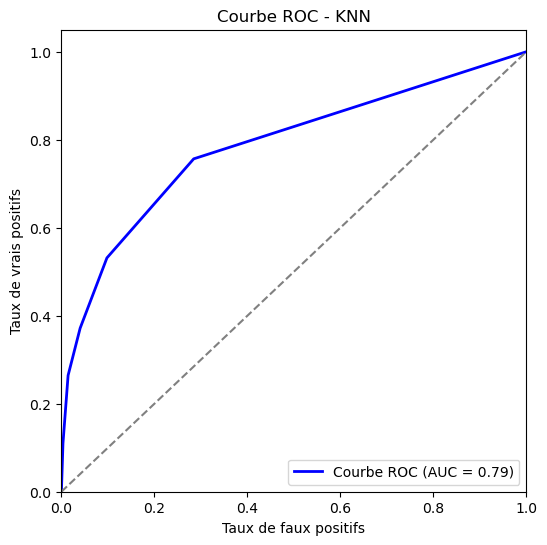

In [161]:
from sklearn.metrics import roc_curve, auc

# Fonction pour afficher la courbe ROC
def plot_roc_curve(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonale
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title(f'Courbe ROC - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Appliquer à chaque modèle, par exemple, pour le modèle KNN
plot_roc_curve(model_knn, X_test, y_test, "KNN")


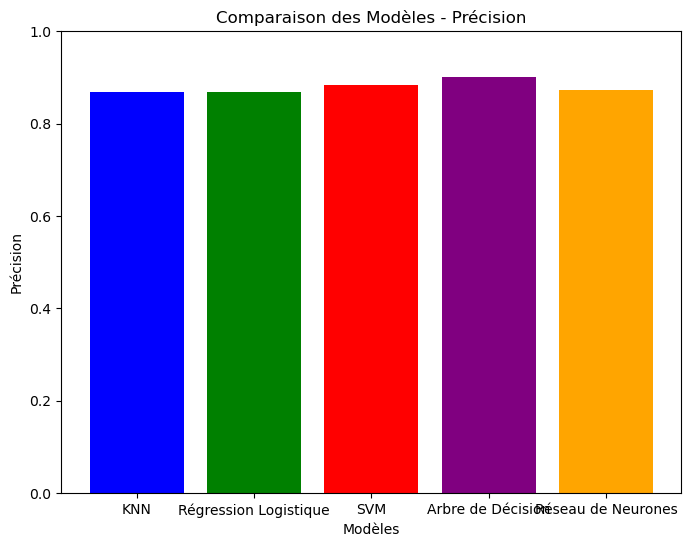

In [162]:
from sklearn.metrics import accuracy_score

# Supposons que vous avez déjà divisé les données en X_train, X_test, y_train, y_test et que les modèles sont déjà entraînés.
# Exemple avec les prédictions pour chaque modèle
y_pred_knn =model_knn.predict(X_test)  # Remplacez knn_model par votre modèle KNN
y_pred_lr = model_knn.predict(X_test)    # Remplacez lr_model par votre modèle Logistique
y_pred_svm = model_svm.predict(X_test)  # Remplacez svm_model par votre modèle SVM
y_pred_tree = model_dt.predict(X_test)  # Remplacez tree_model par votre modèle d'arbre de décision
y_pred_nn = model_nn.predict(X_test)    # Remplacez nn_model par votre modèle de réseau de neurones

# Calcul des précisions
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
accuracy_nn = accuracy_score(y_test, y_pred_nn)

# Comparaison des précisions de tous les modèles
models = ['KNN', 'Régression Logistique', 'SVM', 'Arbre de Décision', 'Réseau de Neurones']
accuracies = [accuracy_knn, accuracy_lr, accuracy_svm, accuracy_tree, accuracy_nn]

# Tracer le graphique
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Modèles")
plt.ylabel("Précision")
plt.title("Comparaison des Modèles - Précision")
plt.ylim([0, 1])  # Limiter l'axe des Y de 0 à 1
plt.show()



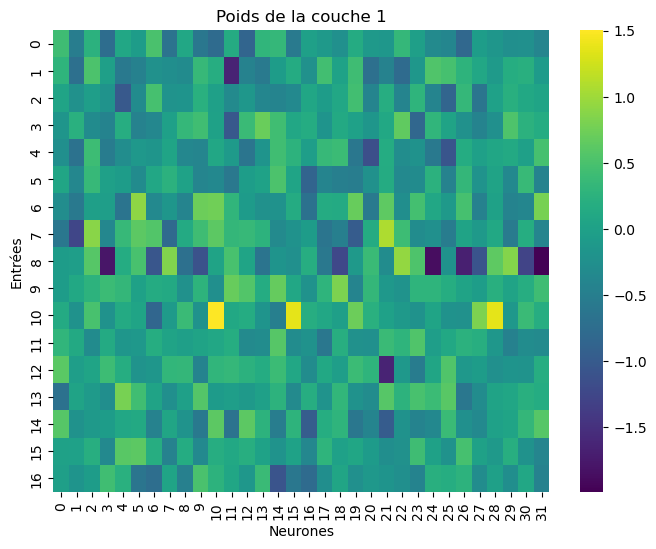

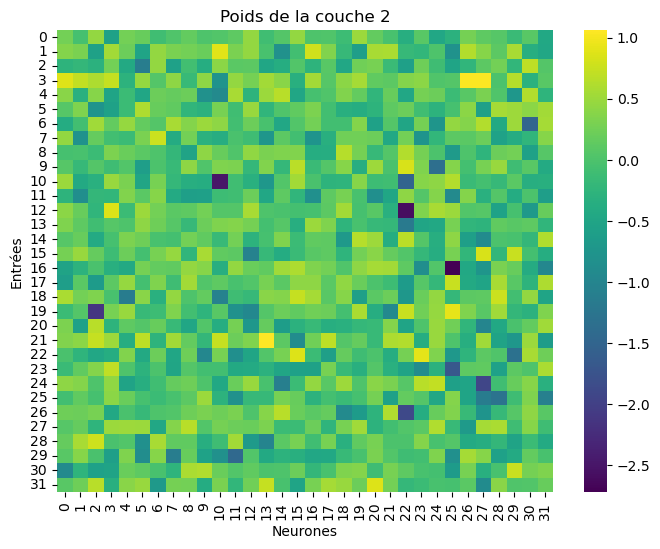

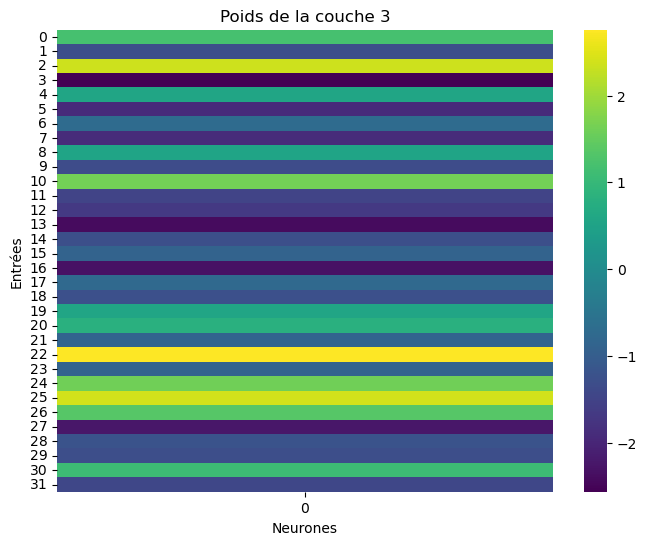

In [163]:
# Visualiser les poids du modèle Réseau de Neurones
def plot_nn_weights(model):
    for layer_idx, layer in enumerate(model.coefs_):
        plt.figure(figsize=(8, 6))
        sns.heatmap(layer, cmap='viridis')
        plt.title(f"Poids de la couche {layer_idx + 1}")
        plt.xlabel("Neurones")
        plt.ylabel("Entrées")
        plt.show()

# Appliquer à votre modèle réseau de neurones (si vous avez utilisé MLPClassifier)
plot_nn_weights(model_nn)


In [169]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# 🔹 Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 🔹 Définition des modèles
model_knn = KNeighborsClassifier(n_neighbors=5)
model_lr = LogisticRegression()
model_svm = SVC()
model_tree = DecisionTreeClassifier()
model_nn = MLPClassifier(max_iter=5000, learning_rate_init=1e-5, tol=1e-5, solver='adam', alpha=1e-4) 

models_list = [model_knn, model_lr, model_svm, model_tree, model_nn]

# 🔹 Calcul des erreurs d'entraînement avec validation croisée
train_errors = []
for model in models_list:
    train_error = 1 - np.mean(cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='accuracy'))
    train_errors.append(train_error)

# 🔹 Entraînement des modèles avant la prédiction sur X_test_scaled
for model in models_list:
    model.fit(X_train_scaled, y_train)  # Fitting des modèles

# 🔹 Prédictions sur X_test_scaled
y_pred_list = [model.predict(X_test_scaled) for model in models_list]
accuracy_list = [accuracy_score(y_test, y_pred) for y_pred in y_pred_list]

# 🔹 Calcul des erreurs de test
test_errors = [1 - acc for acc in accuracy_list]

# 🔹 Affichage des erreurs
print("Erreurs d'entraînement : ", train_errors)
print("Erreurs de test : ", test_errors)




Erreurs d'entraînement :  [0.12347931873479323, 0.11506488240064883, 0.10796836982968383, 0.1419302514193025, 0.10502838605028375]
Erreurs de test :  [0.1321978913219789, 0.11678832116788318, 0.11557177615571779, 0.1455798864557989, 0.10948905109489049]


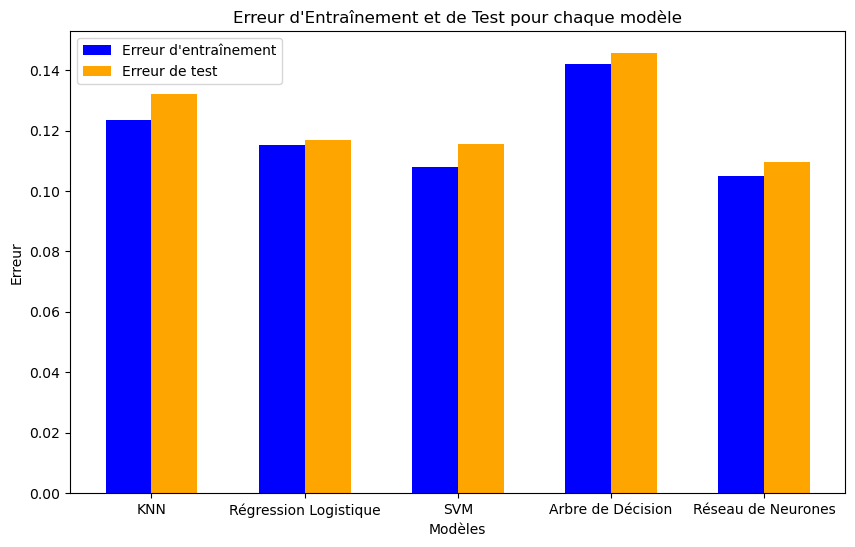

In [170]:
# Affichage des erreurs d'entraînement et de test
models_names = ['KNN', 'Régression Logistique', 'SVM', 'Arbre de Décision', 'Réseau de Neurones']

plt.figure(figsize=(10, 6))
bar_width = 0.3
index = np.arange(len(models_names))

plt.bar(index, train_errors, bar_width, label="Erreur d'entraînement", color='blue')
plt.bar(index + bar_width, test_errors, bar_width, label="Erreur de test", color='orange')

plt.xlabel('Modèles')
plt.ylabel('Erreur')
plt.title("Erreur d'Entraînement et de Test pour chaque modèle")
plt.xticks(index + bar_width / 2, models_names)
plt.legend()
plt.show()
